**Spotify Song Classification Project**


---



*  70472019113 | N205 | Nityoday Tekchandani
*  70472019169 | N214 | Rahul Noolu
*   70472019182 | N220 | Mahim Kapoor



---







In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams #for parameters of plots
from sklearn.decomposition import PCA #principal component analysis, reducing dimensionality
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from itertools import product
import time
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/genres_v2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
df = df.head(5000)  #We reduce dataset rows to 5000

In [ ]:
rows = df.shape[0]
columns = df.shape[1]
print(f'There are {rows} rows and {columns} columns in dataset.\n')
df.isnull().sum()

There are 5000 rows and 22 columns in dataset.



danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
type                   0
id                     0
uri                    0
track_href             0
analysis_url           0
duration_ms            0
time_signature         0
genre                  0
song_name           2410
Unnamed: 0          2592
title               2592
dtype: int64

In [ ]:
# drop unnecessary columns
df = df.drop(columns=['title', 'Unnamed: 0', 'id', 'uri', 'track_href', 'analysis_url','type','song_name'])  # axis=1

# drop duplicates
df = df.drop_duplicates()

rows = df.shape[0]
columns = df.shape[1]
print(f'There are {rows} rows and {columns} columns in dataset.\n')

df.isnull().sum()

There are 4921 rows and 14 columns in dataset.



danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
genre               0
dtype: int64

## EDA

**Terminologies**

*Danceability* - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

*Energy* - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

*Key* - 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation .

*Loudness* - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

*Mode* - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

*Speechiness* - 	Speechiness detects the presence of spoken words in a track.

*Acousticness* - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

*Instrumentalness* - Predicts whether a track contains no vocals. 

*Liveness* - Detects the presence of an audience in the recording.

*Valence* - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

*Tempo* - The overall estimated tempo of a track in beats per minute (BPM).

In [ ]:
#Counting and Printing all the unique values of genres

unique = len(df['genre'].unique())
print(f"Number of genres in given dataset: {unique} \n")

df["genre"].unique()

Number of genres in given dataset: 15 



array(['RnB', 'Dark Trap', 'Underground Rap', 'techno', 'hardstyle',
       'techhouse', 'Pop', 'Trap Metal', 'Hiphop', 'trap', 'psytrance',
       'trance', 'dnb', 'Rap', 'Emo'], dtype=object)

In [ ]:
#Finding the number of values for each genre present in the dataset  
df['genre'].value_counts()

Underground Rap    682
Dark Trap          588
Hiphop             375
techno             349
hardstyle          346
trance             335
dnb                335
techhouse          329
trap               323
psytrance          322
RnB                246
Trap Metal         232
Rap                205
Emo                200
Pop                 54
Name: genre, dtype: int64

<Axes: xlabel='genre', ylabel='Count'>

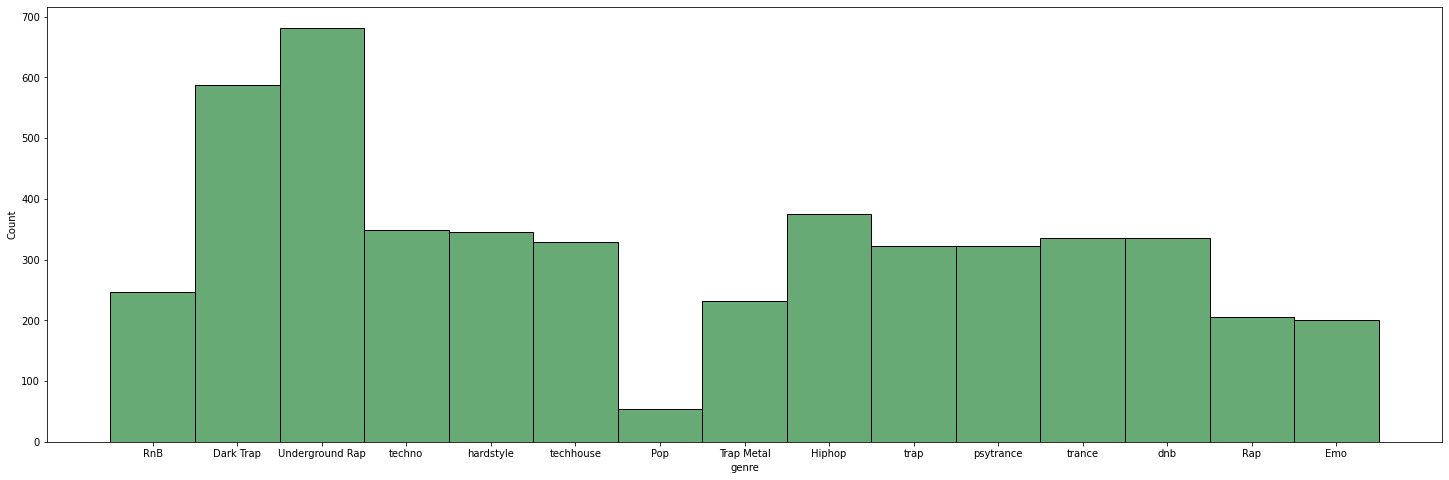

In [ ]:
# Histogram plottin of each genre count
from matplotlib import pyplot as plt
plt.figure(figsize=(25,8))
sns.histplot(df.genre)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4921 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4921 non-null   float64
 1   energy            4921 non-null   float64
 2   key               4921 non-null   int64  
 3   loudness          4921 non-null   float64
 4   mode              4921 non-null   int64  
 5   speechiness       4921 non-null   float64
 6   acousticness      4921 non-null   float64
 7   instrumentalness  4921 non-null   float64
 8   liveness          4921 non-null   float64
 9   valence           4921 non-null   float64
 10  tempo             4921 non-null   float64
 11  duration_ms       4921 non-null   int64  
 12  time_signature    4921 non-null   int64  
 13  genre             4921 non-null   object 
dtypes: float64(9), int64(4), object(1)
memory usage: 576.7+ KB


Text(0.5, 1.0, 'Liveness with respect to the duration in minutes')

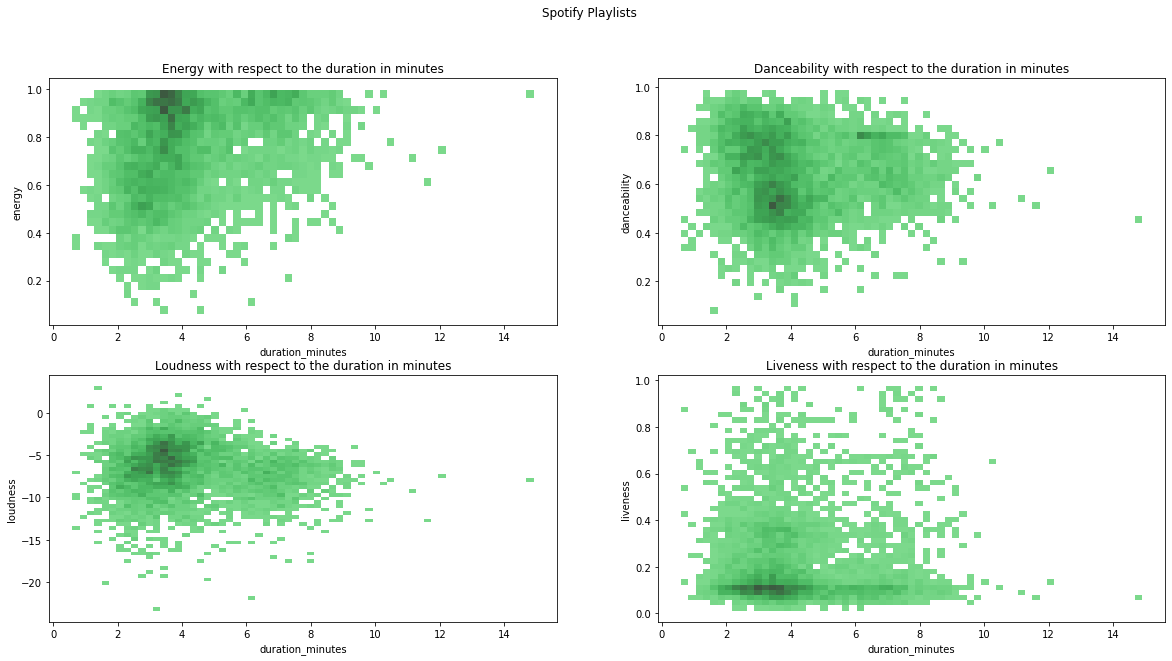

In [ ]:
sns.set_palette("PRGn_r")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Graphs')
df['duration_minutes'] = df['duration_ms']/60000
# Energy with respect to the duration in minutes
sns.histplot()
sns.histplot(data=df, x="duration_minutes", y="energy", kde=True, ax=axes[0][0])
axes[0][0].set_title("Energy with respect to the duration in minutes")
# Danceability with respect to the duration in minutes
sns.histplot()
sns.histplot(data=df, x="duration_minutes", y="danceability", kde=True, ax=axes[0][1])
axes[0][1].set_title("Danceability with respect to the duration in minutes")
# Loudness with respect to the duration in minutes
sns.histplot()
sns.histplot(data=df, x="duration_minutes", y="loudness", kde=True, ax=axes[1][0])
axes[1][0].set_title("Loudness with respect to the duration in minutes")
# Liveness with respect to the duration in minutes
sns.histplot()
sns.histplot(data=df, x="duration_minutes", y="liveness", kde=True, ax=axes[1][1])
axes[1][1].set_title("Liveness with respect to the duration in minutes")



<Axes: xlabel='energy'>

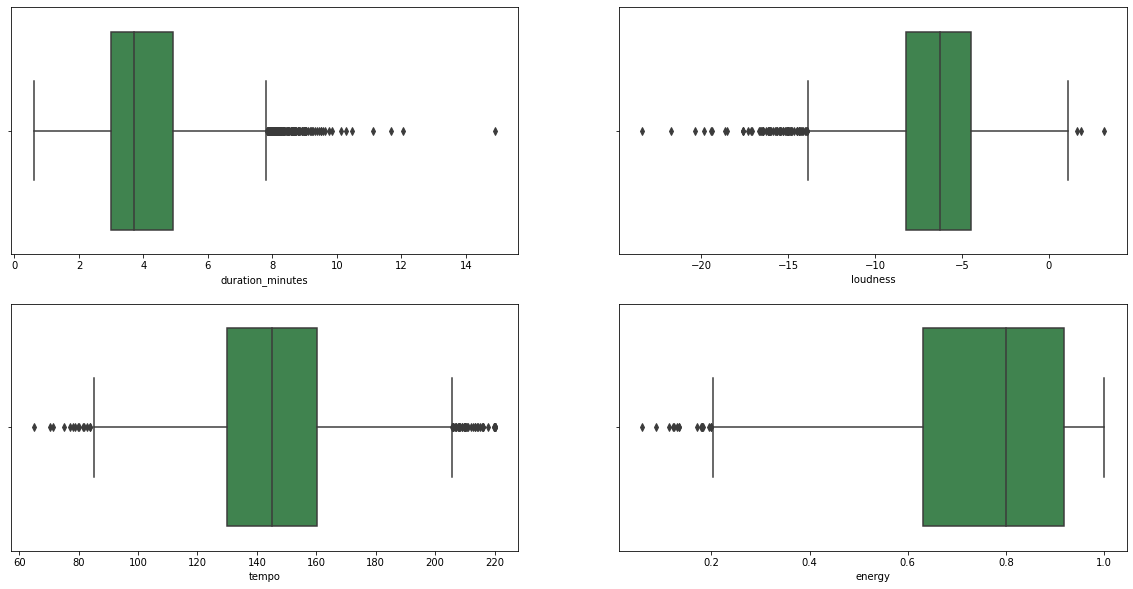

In [ ]:
sns.set_palette("PRGn_r")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.boxplot(data = df, x = "duration_minutes", ax=axes[0][0])
sns.boxplot(data = df, x = "loudness", ax=axes[0][1])
sns.boxplot(data = df, x = "tempo", ax=axes[1][0])
sns.boxplot(data = df, x = "energy", ax=axes[1][1])

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'duration_minutes'}>, <Axes: >, <Axes: >]],
      dtype=object)

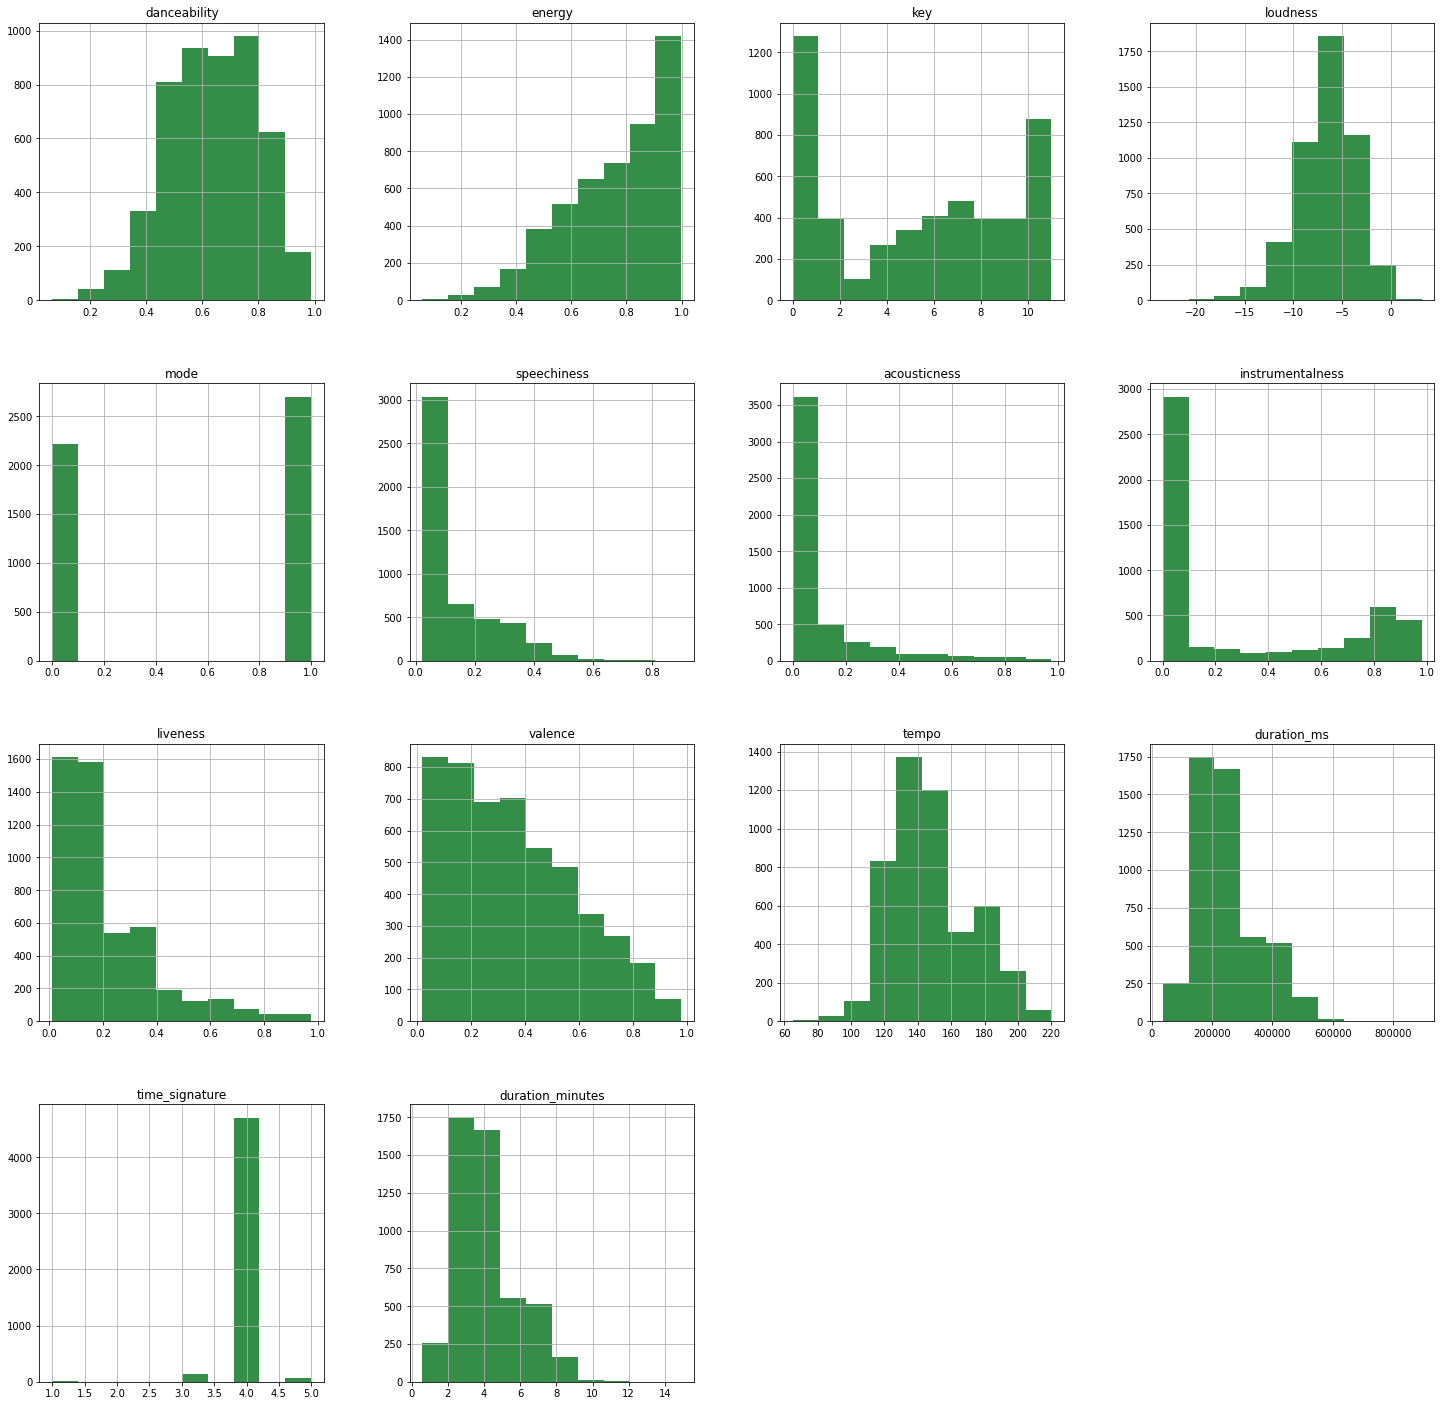

In [ ]:
df.hist(figsize=(25,25))

 We're gonna start by looking at key, which refers to the musical key of the song, and mode, which indicates a track's modality (major or minor), such that 1 corresponds to major and 0 corresponds to minor.
 

Text(0.5, 1.0, 'Number of Songs Per Key')

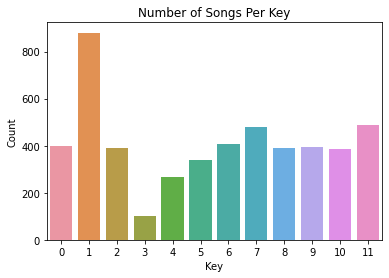

In [ ]:
from collections import Counter

# get counts for each key
key_counter = Counter(df['key'])

# create df for bar graph
key_df = pd.DataFrame.from_dict(key_counter, orient='index').reset_index()
key_df.columns = ['Key', 'Count']

# create bar plot for keys
sns.barplot(x='Key', y='Count', data=key_df).set_title('Number of Songs Per Key')

Text(0.5, 1.0, 'Number of Songs Per Mode')

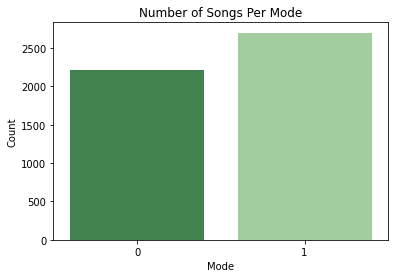

In [ ]:
# get counts for each mode, convert to df
mode_df = pd.DataFrame.from_dict(Counter(df['mode']), orient='index').reset_index()
mode_df.columns = ['Mode', 'Count']

# make mode bar plot
sns.barplot(x='Mode', y='Count', data=mode_df).set_title('Number of Songs Per Mode')

## Preprocess the Data

In [ ]:
# Converting the duration to minutes
df['duration_min'] = df['duration_ms']/60000
# Dropping duration ms column
df.drop('duration_ms',axis=1,inplace=True)

In [ ]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_minutes,duration_min
0,0.747,0.660,1,-7.632,1,0.1910,0.323000,0.000004,0.1460,0.3190,140.054,4,RnB,3.349967,3.349967
1,0.728,0.540,6,-8.954,1,0.0520,0.432000,0.011900,0.1450,0.5900,164.012,4,RnB,5.142217,5.142217
2,0.584,0.485,0,-10.937,1,0.0418,0.834000,0.000014,0.1090,0.0339,120.046,4,Dark Trap,2.401083,2.401083
3,0.276,0.484,7,-11.099,1,0.0435,0.000094,0.325000,0.5250,0.0394,116.801,4,Dark Trap,3.897433,3.897433
4,0.823,0.419,10,-10.358,0,0.1650,0.416000,0.000000,0.1050,0.2770,119.958,4,RnB,3.124217,3.124217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.676,0.630,10,-8.019,0,0.3530,0.333000,0.612000,0.1650,0.3550,173.640,4,dnb,4.679400,4.679400
4996,0.278,0.470,2,-15.062,1,0.0456,0.000086,0.002350,0.1480,0.0775,137.961,5,Dark Trap,3.371433,3.371433
4997,0.851,0.634,11,-8.672,0,0.1960,0.260000,0.882000,0.0766,0.0399,135.017,4,Trap Metal,2.710233,2.710233
4998,0.880,0.868,1,-6.659,1,0.2500,0.238000,0.000000,0.0437,0.8450,205.974,4,Underground Rap,4.264450,4.264450


### Correlation analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded_correl = df
df_encoded_correl['genre'] = LabelEncoder().fit_transform(df_encoded_correl['genre'])

#Making the Correlation matrix

correlation_matrix = df_encoded_correl.corr()
correlation_matrix.style.background_gradient(cmap = "magma")

# No highly correlated values, hence no redundancy, we do not drop any features. all of them can be used in the model

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_minutes,duration_min
danceability,1.000000,-0.330267,-0.040517,-0.212742,0.091980,0.201310,0.085303,-0.070473,-0.198125,0.373317,-0.152741,0.054137,-0.053260,-0.041517,-0.041517
energy,-0.330267,1.000000,0.054247,0.591191,-0.027243,-0.184754,-0.492502,0.305360,0.240547,-0.026161,-0.028675,0.031018,0.451709,0.281298,0.281298
key,-0.040517,0.054247,1.000000,0.005181,-0.259295,-0.025866,0.006896,0.058949,0.004060,0.040863,-0.009017,0.005556,0.020610,0.052705,0.052705
loudness,-0.212742,0.591191,0.005181,1.000000,-0.021462,0.032045,-0.269852,-0.174541,0.163805,0.068663,0.154708,0.020771,0.142660,-0.089814,-0.089814
mode,0.091980,-0.027243,-0.259295,-0.021462,1.000000,0.035831,-0.023853,-0.008093,0.015367,0.030270,-0.035790,0.006209,-0.003777,-0.019958,-0.019958
speechiness,0.201310,-0.184754,-0.025866,0.032045,0.035831,1.000000,0.164524,-0.379024,0.048244,0.233553,0.182027,0.037831,-0.152557,-0.300771,-0.300771
acousticness,0.085303,-0.492502,0.006896,-0.269852,-0.023853,0.164524,1.000000,-0.259986,-0.116700,0.125455,0.046403,-0.007985,-0.336023,-0.249921,-0.249921
instrumentalness,-0.070473,0.305360,0.058949,-0.174541,-0.008093,-0.379024,-0.259986,1.000000,-0.018628,-0.261235,-0.208963,0.003867,0.415056,0.589671,0.589671
liveness,-0.198125,0.240547,0.004060,0.163805,0.015367,0.048244,-0.116700,-0.018628,1.000000,-0.029951,0.020862,0.017252,0.106518,0.003694,0.003694
valence,0.373317,-0.026161,0.040863,0.068663,0.030270,0.233553,0.125455,-0.261235,-0.029951,1.000000,0.067606,0.053326,-0.166831,-0.182785,-0.182785


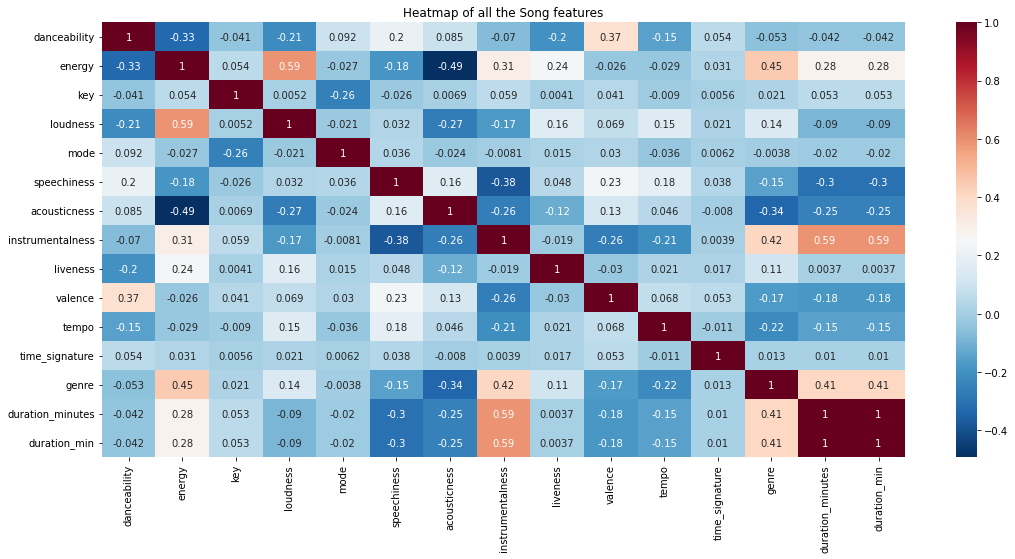

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df_encoded_correl.corr(), annot=True, cmap="RdBu_r")
plt.title("Heatmap of all the Song features")
plt.show()

### Feature Scaling and Normalization

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['genre_enco'] = LabelEncoder().fit_transform(df['genre'])
df['genre_enco'].value_counts()

7     682
0     588
2     375
12    349
9     346
13    335
8     335
11    329
14    323
10    322
5     246
6     232
4     205
1     200
3      54
Name: genre_enco, dtype: int64

In [ ]:
X1 = df.drop(columns=['genre','genre_enco'])
Y1 = df["genre_enco"]

In [ ]:
# feature scaling and normalization
from sklearn.preprocessing import StandardScaler
X1_std = StandardScaler().fit_transform(X1)

In [ ]:
from imblearn.over_sampling import SMOTE #Balance the class distribution, increases number of minority class instances
resample = SMOTE()
X1, Y1 = resample.fit_resample(X1_std, Y1)

## Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=.2, random_state=1, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(8184, 14)
(2046, 14)


In [ ]:
scoring = [['model','accuracy']]

### Bulding models

In [ ]:
def buildModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # train model
    yhat = model.predict(X_test) # predict
    score = accuracy_score(y_test, yhat)
    return {
      "predict": yhat,
      "accuracy": score
    }

In [ ]:
def modelCrossValidation(X, Y, algo):
    validation = KFold(n_splits=5, shuffle=True, random_state=1)
    statsNames = ['accuracy', 'balanced_accuracy', 'f1_weighted', 'f1_macro']

    res = {}
    for sname in statsNames:
        res[sname] = round(cross_val_score(algo, X, Y, cv=validation, scoring=sname, n_jobs=-1).mean(), 4)
    return res

### Feature Importance

[0.08113325 0.05561687 0.02784584 0.05827872 0.05168337 0.05537254
 0.042827   0.15062678 0.02872875 0.0554305  0.20287977 0.0694076
 0.12016894 0.        ]


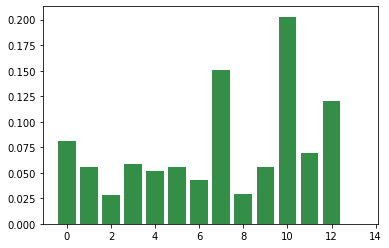

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

# feature importance
print(model.feature_importances_)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

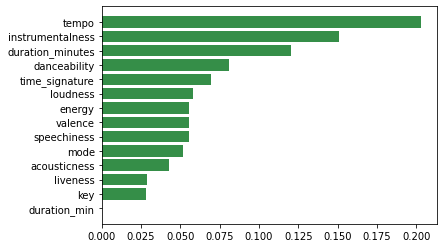

In [ ]:
importance = model.feature_importances_
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df.drop(columns=['genre','genre_enco']).columns)[indices])
#Tempo is the most important factor for the respective classification

### Model Selection

#### LogisticRegression

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=1000);
res_LR = buildModel(model_LR, X_train, X_test, y_train, y_test)
scoring.append(['Logistic Regression', res_LR["accuracy"]])
print(res_LR["accuracy"])

0.5869990224828935


#### Naive Bayes

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
res_NB = buildModel(model_NB, X_train, X_test, y_train, y_test)
scoring.append(['Naive Bayes', res_NB["accuracy"]])
print(res_NB["accuracy"])

0.5962854349951124


#### K-Nearest Neighbors

In [ ]:
# K-Nearest Neighbors for 4 neighbors
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=4)
res_KNN = buildModel(model_KNN, X_train, X_test, y_train, y_test)
scoring.append(['KNeighbors - 4', res_KNN["accuracy"]])
print(res_KNN["accuracy"])

0.7458455522971652


In [ ]:
# K-Nearest Neighborsfor 5 neighbors
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=5)
res_KNN = buildModel(model_KNN, X_train, X_test, y_train, y_test)
scoring.append(['KNeighbors - 5', res_KNN["accuracy"]])
print(res_KNN["accuracy"])

0.7409579667644184


In [ ]:
# K-Nearest Neighborsfor 10 neighbors
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=10)
res_KNN = buildModel(model_KNN, X_train, X_test, y_train, y_test)
scoring.append(['KNeighbors - 10', res_KNN["accuracy"]])
print(res_KNN["accuracy"])

0.696969696969697


In [ ]:
# K-Nearest Neighborsfor 20 neighbors
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=20)
res_KNN = buildModel(model_KNN, X_train, X_test, y_train, y_test)
scoring.append(['KNeighbors - 20', res_KNN["accuracy"]])
print(res_KNN["accuracy"])

0.6422287390029325


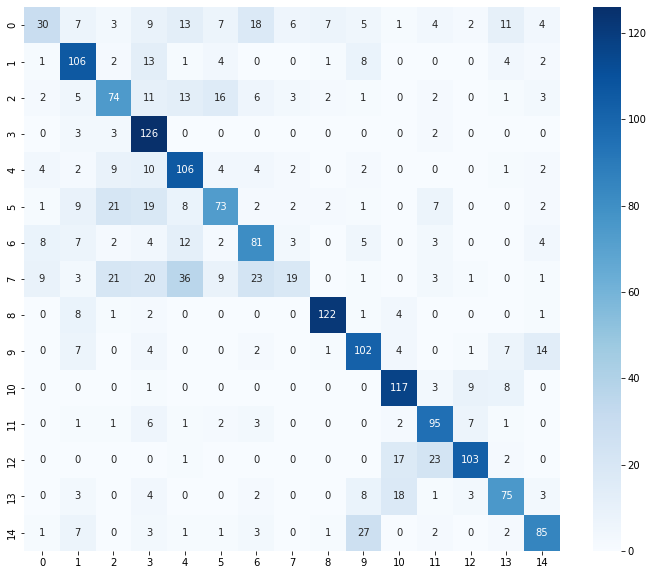

In [ ]:
cm = confusion_matrix(y_test, res_KNN['predict'])
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#### Decision Tree

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=2)
res_DT = buildModel(model_DT, X_train, X_test, y_train, y_test)
scoring.append(['Decision Tree', res_DT["accuracy"]])
print(res_DT["accuracy"])

0.6417399804496579


In [ ]:
# Decision Tree with more depths and less splits
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=25, min_samples_split=4, random_state=2)
res_DT = buildModel(model_DT, X_train, X_test, y_train, y_test)
print(res_DT["accuracy"])

0.6886608015640274


In [ ]:
#Importance
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.11361
Feature: 1, Score: 0.07498
Feature: 2, Score: 0.02972
Feature: 3, Score: 0.06283
Feature: 4, Score: 0.01086
Feature: 5, Score: 0.07801
Feature: 6, Score: 0.04856
Feature: 7, Score: 0.07150
Feature: 8, Score: 0.04032
Feature: 9, Score: 0.06714
Feature: 10, Score: 0.27326
Feature: 11, Score: 0.00367
Feature: 12, Score: 0.06943
Feature: 13, Score: 0.05609


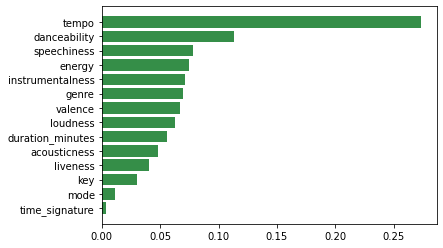

In [ ]:
# plot feature importance
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df.columns)[indices])

#### Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Accuracy 
k = 5
model_RF = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=3)
cv_score = cross_val_score(model_RF, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean())

# Test Accuracy
clf_RF = model_RF.fit(X_train, y_train)
y_pred = clf_RF.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['RandomForest', score_accuracy])

Cross_val Scores:  [0.8197923  0.82101405 0.82651191 0.81124007 0.81051345]
Train Accuracy(average): 0.8178143571713419
Test Accuracy: 0.8240469208211144


Feature: 0, Score: 0.09884
Feature: 1, Score: 0.07141
Feature: 2, Score: 0.03718
Feature: 3, Score: 0.07773
Feature: 4, Score: 0.01374
Feature: 5, Score: 0.06984
Feature: 6, Score: 0.06343
Feature: 7, Score: 0.08771
Feature: 8, Score: 0.05217
Feature: 9, Score: 0.07007
Feature: 10, Score: 0.18067
Feature: 11, Score: 0.00464
Feature: 12, Score: 0.08895
Feature: 13, Score: 0.08362


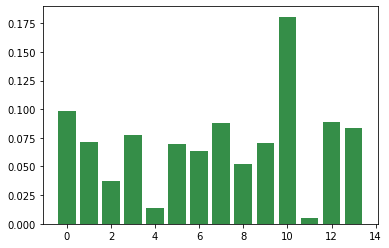

In [ ]:
# get importance
importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

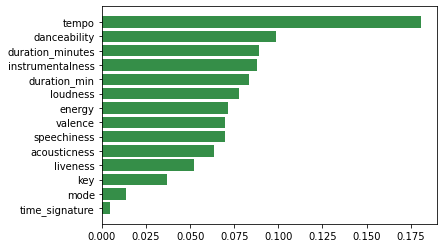

In [ ]:
indices = np.argsort(importance)

fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(df.drop(columns=['genre','genre_enco']).columns)[indices])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       127
           1       0.85      0.92      0.89       142
           2       0.68      0.71      0.69       139
           3       0.90      0.98      0.94       134
           4       0.83      0.86      0.85       146
           5       0.81      0.81      0.81       147
           6       0.65      0.84      0.73       131
           7       0.45      0.25      0.32       146
           8       0.96      0.96      0.96       139
           9       0.92      0.96      0.94       142
          10       0.95      0.94      0.95       138
          11       0.85      0.94      0.89       119
          12       0.90      0.91      0.91       146
          13       0.91      0.91      0.91       117
          14       0.88      0.89      0.89       133

    accuracy                           0.82      2046
   macro avg       0.81      0.83      0.82      2046
weighted avg       0.81   

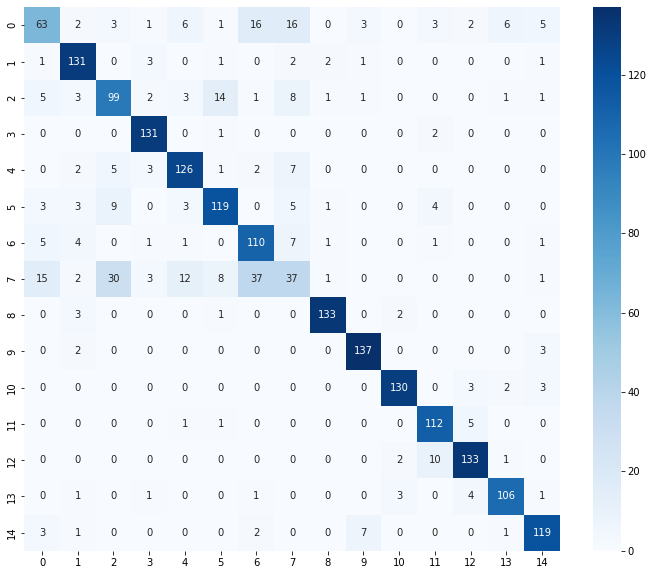

In [ ]:
# y_pred = res_RF['predict']
cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

k = 3

# Train Accuracy 
model_svc = SVC(kernel="rbf", C=1000, gamma="scale")  #C = regularization parameter
cv_score = cross_val_score(model_svc, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Test Accuracy
clf_svc = model_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['SVC', score_accuracy])

Cross_val Scores:  [0.80095308 0.8159824  0.78995601]
Train Accuracy(average): 0.802297165200391
Test Accuracy: 0.8372434017595308


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46       127
           1       0.87      0.96      0.91       142
           2       0.74      0.77      0.76       139
           3       0.96      1.00      0.98       134
           4       0.82      0.89      0.85       146
           5       0.83      0.85      0.84       147
           6       0.72      0.88      0.79       131
           7       0.54      0.32      0.40       146
           8       0.97      0.97      0.97       139
           9       0.95      0.92      0.94       142
          10       0.94      0.96      0.95       138
          11       0.88      0.89      0.88       119
          12       0.94      0.91      0.93       146
          13       0.92      0.90      0.91       117
          14       0.91      0.89      0.90       133

    accuracy                           0.84      2046
   macro avg       0.83      0.84      0.83      2046
weighted avg       0.83   

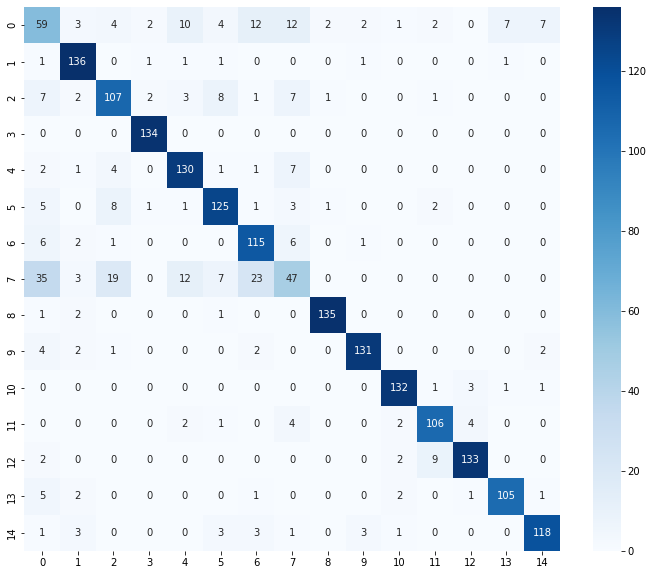

In [ ]:
# import seaborn as sns; sns.set()
cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

#### Bagging

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
k = 5

# Train Accuracy 
model_Bag = BaggingClassifier()
cv_score = cross_val_score(model_Bag, X_train, y_train, cv=k)
print('Cross_val Scores: ', cv_score)
print("Train Accuracy(average):", cv_score.mean()) 

# Test Accuracy
clf_bag = model_Bag.fit(X_train, y_train)
y_pred = clf_bag.predict(X_test)
score_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", score_accuracy)
scoring.append(['Bagging', score_accuracy])

Cross_val Scores:  [0.76175932 0.7666463  0.77214417 0.75687233 0.76650367]
Train Accuracy(average): 0.7647851562208285
Test Accuracy: 0.7717497556207233


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50       127
           1       0.75      0.89      0.82       142
           2       0.59      0.65      0.62       139
           3       0.81      0.93      0.86       134
           4       0.73      0.80      0.76       146
           5       0.73      0.69      0.71       147
           6       0.67      0.75      0.71       131
           7       0.35      0.21      0.26       146
           8       0.92      0.95      0.94       139
           9       0.90      0.94      0.92       142
          10       0.95      0.91      0.93       138
          11       0.82      0.90      0.86       119
          12       0.92      0.84      0.88       146
          13       0.86      0.85      0.85       117
          14       0.85      0.85      0.85       133

    accuracy                           0.77      2046
   macro avg       0.76      0.77      0.76      2046
weighted avg       0.76   

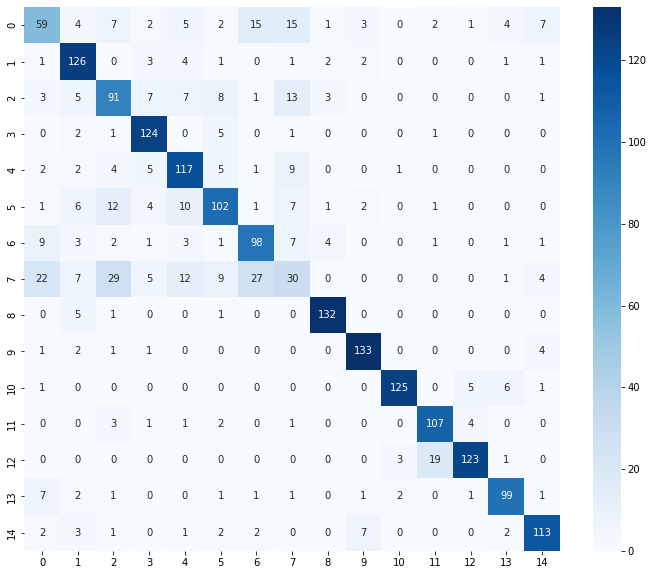

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

### Compare Model Result

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = scoring[0]
for i in range(len(scoring)):
    if i!=0:
        scoring[i][1] *= 100 
        table.add_row(scoring[i])
print(table)

+---------------------+--------------------+
|        model        |      accuracy      |
+---------------------+--------------------+
| Logistic Regression | 58.69990224828935  |
|     Naive Bayes     | 59.628543499511245 |
|    KNeighbors - 4   | 74.58455522971651  |
|    KNeighbors - 5   | 74.09579667644184  |
|   KNeighbors - 10   |  69.6969696969697  |
|   KNeighbors - 20   | 64.22287390029325  |
|    Decision Tree    | 64.17399804496578  |
|     RandomForest    | 82.40469208211144  |
|         SVC         | 83.72434017595309  |
|       Bagging       | 77.17497556207233  |
+---------------------+--------------------+


In [ ]:
# drawing chart to compare algorithms
import plotly.express as px
toChart = pd.DataFrame(scoring, columns =['algorithm', 'accuracy']) 
toChart.drop(0, inplace=True)

px.bar(toChart, x="algorithm", y="accuracy")